In [1]:
import h5py
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c
import numpy as np

import read_nugrid as rn
plt.style.use('stylesheet.mplstyle')
%config InlineBackend.figure_formats = ['svg']

## Read Nomoto+13 table

In [2]:
filename = './popIII_N13.txt'
Pop3Table = rn.readTable(filename)

## Read Heger & Woosley 2010 table

In [3]:
filename = './popIII_heger10.txt'
Pop3TableH10 = rn.readTable(filename)

## Translate to GFM 11 elements table

In [4]:
Pop3TableArepo = rn.PopIIIturnToArepoWith11Elements(Pop3Table)

In [5]:
Pop3TableH10Arepo = rn.PopIIIturnToArepoWith11Elements(Pop3TableH10)

## Read GFM Portinari+98 table

In [6]:
GFM_SNII = h5py.File('./SNII.hdf5', 'r')

## Comparison

### Total Metals

Text(0, 0.5, '$y_Z(m)$ [$M_{\\odot}$]')

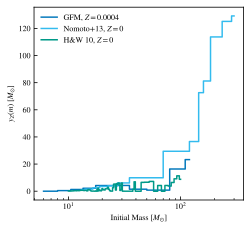

In [7]:
plt.step(GFM_SNII['Masses'][:],GFM_SNII['Yields']['Z_0.0004']['Total_Metals'][:],where='mid', label='GFM, $Z=0.0004$')
plt.step(Pop3Table['Masses'],Pop3Table['Yields']['Z_0.0']['Total_Metals'],where='mid', label='Nomoto+13, $Z=0$')
plt.step(Pop3TableH10['Masses'],Pop3TableH10['Yields']['Z_0.0']['Total_Metals'],where='mid', label='H&W 10, $Z=0$')
plt.legend(framealpha=0)
plt.xlabel(r'Initial Mass [$M_{\odot}$]')
plt.xscale('log')
plt.ylabel(r'$y_Z(m)$ [$M_{\odot}$]')

### Yields

In [8]:
def plotSubplots(table,i):
    ax = fig.add_subplot(3,4,i+1)
    ax.set_title(str(table['Species_names'][i])[2:-1],weight='bold')
    ax.step(table['Masses'][:], table['Yields']['Z_0.0004']['Yield'][i],where='mid', label='GFM, $Z=0.0004$',linewidth=1)
    ax.step(Pop3Table['Masses'],Pop3TableArepo['Yields']['Z_0.0']['Yield'][i],where='mid', label='Nomoto+13, $Z=0$',linewidth=1)
    ax.step(Pop3TableH10['Masses'],Pop3TableH10Arepo['Yields']['Z_0.0']['Yield'][i],where='mid', label='H&W 10 $Z=0$',linewidth=1)

    ax.set_xscale('log')
    ax.set_ylabel(r'$y_i(m,Z)$ [$M_{\odot}$]')
    ax.set_xlabel(r'Initial Mass [$M_{\odot}$]')
    if i==10:
        ax.legend(bbox_to_anchor=(1.2, 0.3), loc=3, borderaxespad=0)

/var/folders/kx/t2qz76vx09v331x3k9y0yz800000gn/T/ipykernel_3420/2030131936.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(hspace=0.4,wspace=0.4)


[None, None, None, None, None, None, None, None, None, None, None]

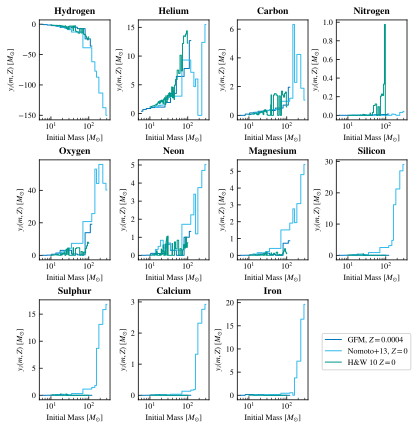

In [9]:
fig = plt.figure(figsize=(6.6,7))
plt.subplots_adjust(hspace=0.4,wspace=0.4)
[plotSubplots(GFM_SNII,i) for i in range(11)]